<div style="background-color : midnightblue; padding : 10pt; font-size: 28pt; font-family: robotosans; color: white; font-weight: bold">Market Basket Analysis using<br>Apriori  .  Eclat  .  FP-Growth Algorithms</div>

<span style="font-family:Robotosans; font-size:11pt; color:black;">Market Basket Analysis (MBA) is a data mining technique used to discover purchasing patterns by analyzing extensive volume of transaction data. Primarily used in retail to understand customer purchase behavior, MBA helps in product placement, promotion strategies, and inventory management. The main objective is to detect "if-then" patterns, find correlations between different items purchased together, using methods such as Association Rule Learning. By leveraging these techniques, retailers can extract meaningful insights from customer purchase data, leading to optimized decision-making in marketing, sales, and product management. For example : if a customer buys 'milk', then the customer is likely to buy 'bread'.</span>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=Warning)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

import seaborn as sns
sns.set_style("whitegrid")
sns.set(font="Arial")
import matplotlib.pyplot as plt
from matplotlib.pyplot import table
from matplotlib.transforms import Bbox
import matplotlib.cm as cm
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors
from matplotlib.pyplot import legend
from matplotlib.lines import Line2D
from matplotlib.cbook import boxplot_stats
%matplotlib inline

# **Apriori Algorithm**
---

In [2]:
df = pd.read_csv("/kaggle/input/market-basket-optimisation/Market_Basket_Optimisation.csv", names=[f"Item_{i}" for i in range(2, 21)])
df = df.reset_index()
df.rename(columns={'index': 'Item1'}, inplace=True)
df.head()

,Item1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10,Item_11,Item_12,Item_13,Item_14,Item_15,Item_16,Item_17,Item_18,Item_19,Item_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# View shape
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 7501 rows and 20 columns.


In [4]:
txns = df.fillna("").values.tolist()
txns = [[item for item in txn if item != ''] for txn in txns]
txns = [[item.strip() for item in txn] for txn in txns]

# Display 5 random lists
txns[:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

In [5]:
# Create a list of unique ids for the transactions
ids = [i + 1 for i in range(len(txns))]

# Initialize an empty DataFrame
data =[]
# Iterate through transactions and add them to the DataFrame with IDs
for i, txn in enumerate(txns):
    data.extend([{'ID': ids[i], 'Item': item} for item in txn])

df_txn = pd.DataFrame(data)
df_txn.head(32)

,ID,Item
0,1,shrimp
1,1,almonds
2,1,avocado
3,1,vegetables mix
4,1,green grapes
5,1,whole weat flour
6,1,yams
7,1,cottage cheese
8,1,energy drink
9,1,tomato juice


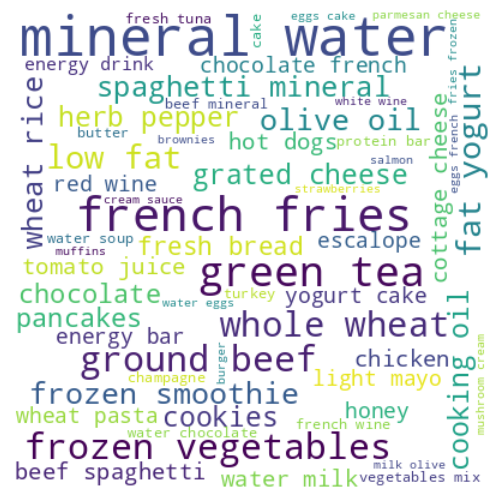

In [6]:
from wordcloud import WordCloud

# Combine Item values into a string with space separator
all_values = [item for txn in txns for item in txn]
all_values_list = ' '.join(all_values)

# Create a word cloud object
wordcloud = WordCloud(width=400, height=400, background_color="white", min_font_size=10, colormap='viridis').generate(all_values_list)

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

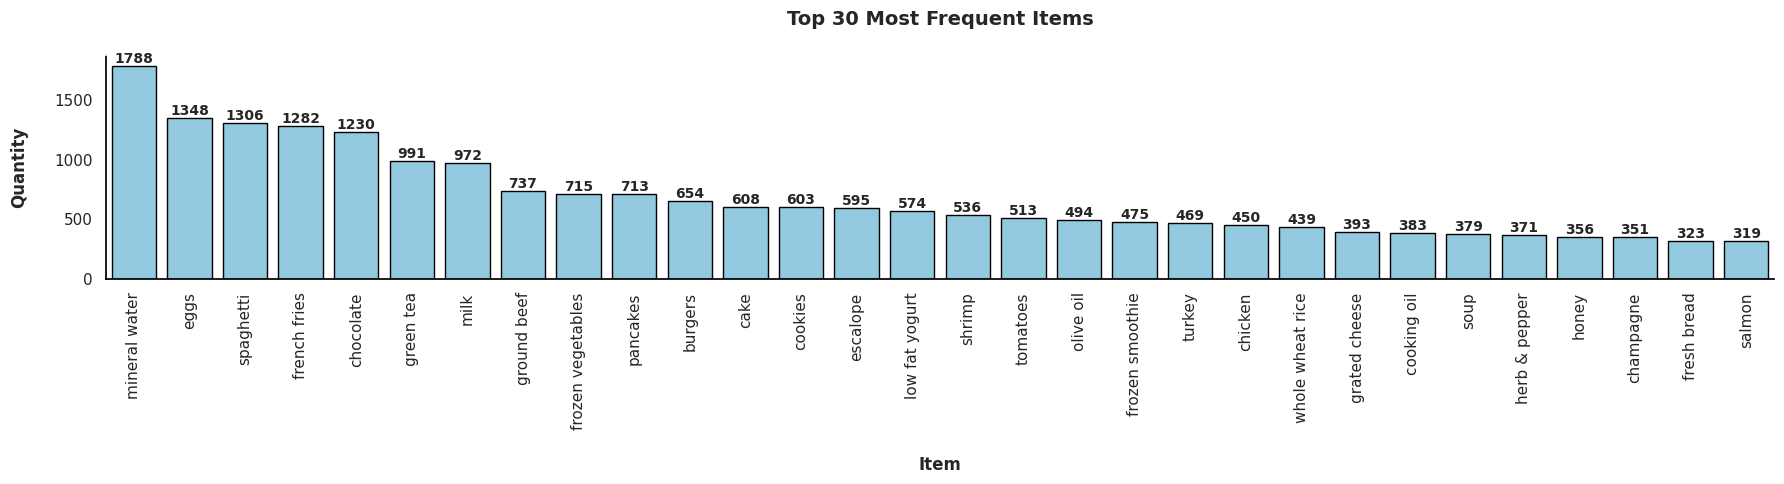

In [7]:
# Get the top 30 most frequent items
top_items = df_txn['Item'].value_counts().head(30).index

# Filter the DataFrame to include only the top items
df_top = df_txn[df_txn['Item'].isin(top_items)]

# Create the countplot with the filtered data
fig, ax = plt.subplots(figsize=(18, 5))
ax = sns.countplot(data=df_top, x="Item", order=top_items, edgecolor="black", color="skyblue")
ax.bar_label(ax.containers[0], fontsize=10, fontweight=600)
plt.title("Top 30 Most Frequent Items\n", fontsize=14, fontweight=700)
plt.xlabel("\nItem", fontsize=12, fontweight=700)
plt.ylabel("Quantity\n", fontsize=12, fontweight=700)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.gca().grid(False)
plt.gca().spines[["left", "bottom"]].set_color("black")
plt.gca().set_facecolor("white")
plt.tight_layout()

plt.show()

In [8]:
item_count = df_top.groupby("Item")["Item"].value_counts().reset_index()
item_count.columns = ["Item", "Count"]
item_count = item_count.sort_values(by="Count", ascending=False)
item_count_top30 = item_count.head(30)
item_count_top30

,Item,Count
20,mineral water,1788
7,eggs,1348
26,spaghetti,1306
9,french fries,1282
4,chocolate,1230
14,green tea,991
19,milk,972
15,ground beef,737
12,frozen vegetables,715
22,pancakes,713


In [9]:
# Create one hot encoding 
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(txns).transform(txns)
te_array
te.columns_
df1 = pd.DataFrame(te_array, columns=te.columns_)
df1.head()

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,extra dark chocolate,flax seed,french fries,french wine,fresh bread,fresh tuna,fromage blanc,frozen smoothie,frozen vegetables,gluten free bar,grated cheese,green beans,green grapes,green tea,ground beef,gums,ham,hand protein bar,herb & pepper,honey,hot dogs,ketchup,light cream,light mayo,low fat yogurt,magazines,mashed potato,mayonnaise,meatballs,melons,milk,mineral water,mint,mint green tea,muffins,mushroom cream sauce,napkins,nonfat milk,oatmeal,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [10]:
# Create one hot encoding 
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(txns).transform(txns)
te_array
te.columns_
df1 = pd.DataFrame(te_array, columns=te.columns_)
df1.head()

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,extra dark chocolate,flax seed,french fries,french wine,fresh bread,fresh tuna,fromage blanc,frozen smoothie,frozen vegetables,gluten free bar,grated cheese,green beans,green grapes,green tea,ground beef,gums,ham,hand protein bar,herb & pepper,honey,hot dogs,ketchup,light cream,light mayo,low fat yogurt,magazines,mashed potato,mayonnaise,meatballs,melons,milk,mineral water,mint,mint green tea,muffins,mushroom cream sauce,napkins,nonfat milk,oatmeal,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [11]:
# Generate frequent itemsets
from mlxtend.frequent_patterns import apriori, association_rules
# Applying Apriori algorithm
min_support_threshold = 0.02
frequent_itemsets = apriori(df1, min_support=min_support_threshold, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
5,0.081056,(cake)
6,0.025730,(cereals)
7,0.046794,(champagne)
8,0.059992,(chicken)
9,0.163845,(chocolate)


In [12]:
# Generate association rules from the frequent itemsets
confidence_threshold = 0.3 
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_threshold)

# Sorting rules by confidence, support, and lift
sorted_rules = rules.sort_values(['confidence', 'support', 'lift'], ascending=[False, False, False])
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
11,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
7,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
8,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
4,(cooking oil),(mineral water),0.051060,0.238368,0.020131,0.394256,1.653978,0.007960,1.257349,0.416672
2,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438,0.396502
6,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270,0.402413
10,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
16,(tomatoes),(mineral water),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
12,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529,0.362712


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


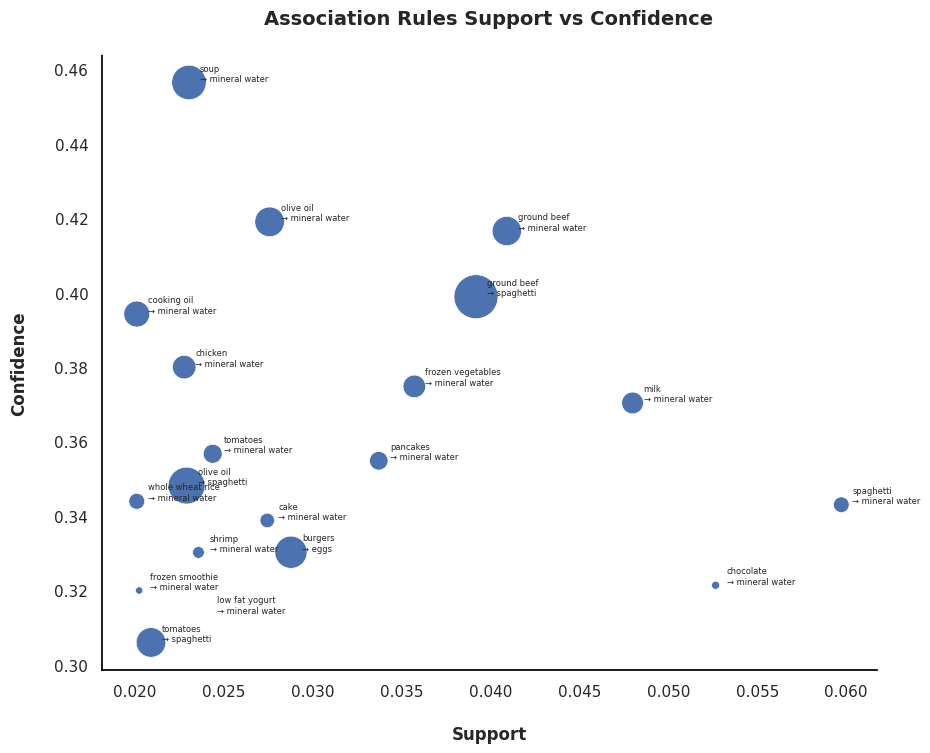

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=sorted_rules, x=sorted_rules["support"], y=sorted_rules["confidence"], palette="Set2", size="lift", sizes=(0, 1000), legend=False)
# Annotate the points with labels
for i, row in sorted_rules.iterrows():
    # Convert frozenset to list, then to string and remove the frozenset and other unwanted characters
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    label = f"{antecedents}\n→ {consequents}" # \nSupport: {row['support']:.3f}, Confidence: {row['confidence']:.3f}"
    plt.annotate(label, (row['support'], row['confidence']), textcoords="offset points", xytext=(8, 1), ha='left', fontsize=6)
plt.title("Association Rules Support vs Confidence\n", fontsize=14, fontweight=700)
plt.xlabel("\nSupport", fontsize=12, fontweight=700)
plt.ylabel("Confidence\n", fontsize=12, fontweight=700)
plt.gca().grid(False)
plt.gca().spines[["left", "bottom"]].set_color("black")
plt.gca().set_facecolor("white")
plt.show()

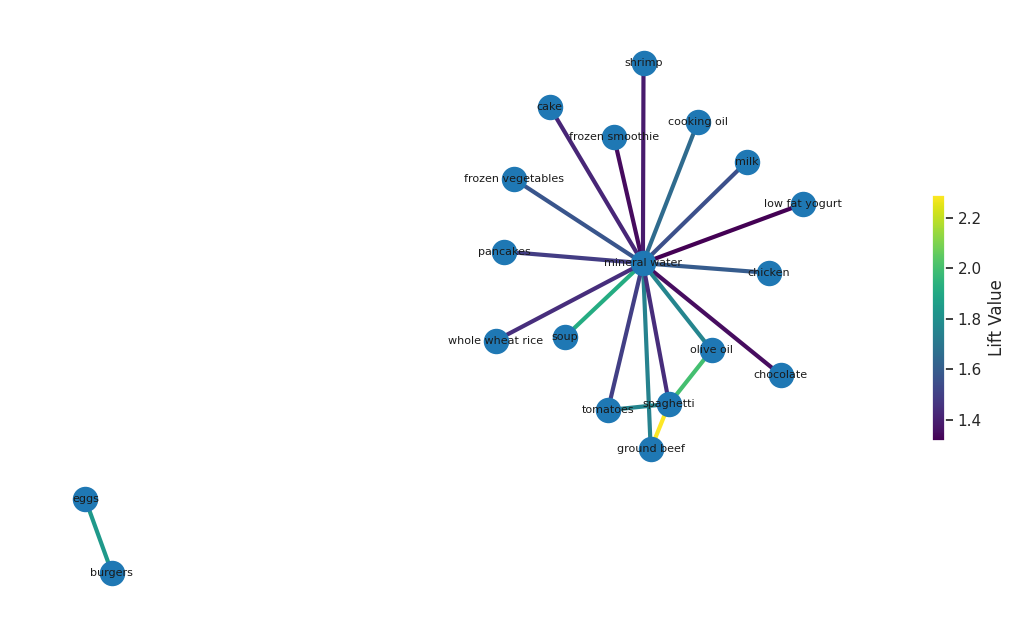

In [14]:
import networkx as nx
import warnings
warnings.filterwarnings("ignore", category=Warning)

# Create a graph
G = nx.Graph()

for _, row in rules.iterrows():
    # Convert frozenset to string
    antecedents_str = ', '.join(list(row['antecedents']))
    consequents_str = ', '.join(list(row['consequents']))
    
    # Add nodes and edges with the string labels
    G.add_node(antecedents_str)
    G.add_node(consequents_str)
    G.add_edge(antecedents_str, consequents_str, weight=row['lift'])

colormap = get_cmap('viridis')
lift_values = [data["weight"] for _, _, data in G.edges(data=True)]
lift_min = min(lift_values)
lift_max = max(lift_values)
lift_norm = mcolors.Normalize(vmin=lift_min, vmax=lift_max)

# Define edge colors and widths based on lift values
edge_colors = lift_values
edge_widths = 3

# Plot the graph
fig, ax = plt.subplots(figsize=(14, 8))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx_nodes(G, pos, node_color="azure", node_size=50)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw(G, pos, edge_color=edge_colors, width=edge_widths, edge_cmap=colormap, edge_vmin=lift_min, edge_vmax=lift_max)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=colormap, norm=lift_norm), ax=ax, shrink=0.4)
cbar.set_label("Lift Value")

plt.axis("off")
plt.show()

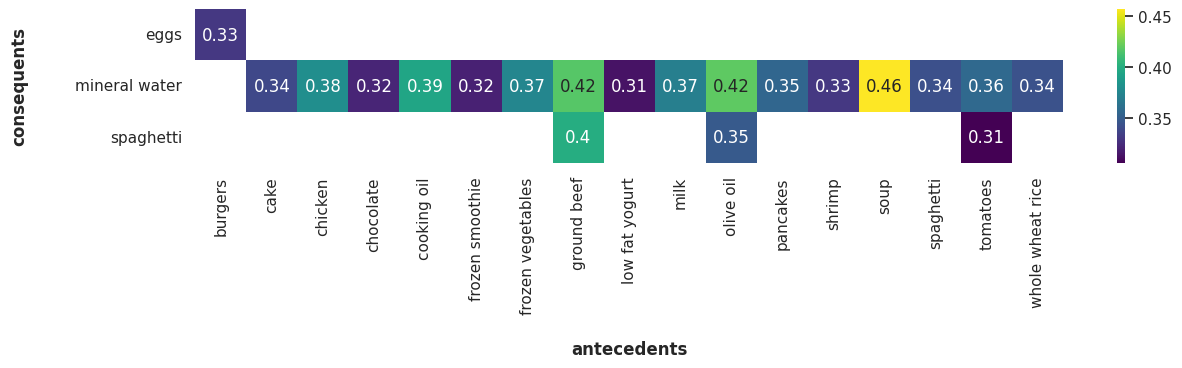

In [15]:
# Convert frozensets to strings and remove 'frozenset' from the representation
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Show frequency or strength of item associations
pivot_table = rules.pivot(index="consequents", columns="antecedents", values="confidence")
plt.figure(figsize=(14, 2))
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.xlabel("\nantecedents", fontsize=12, fontweight=600)
plt.ylabel("consequents\n\n", fontsize=12, fontweight=600)
plt.gca().set_facecolor("white")
plt.show()

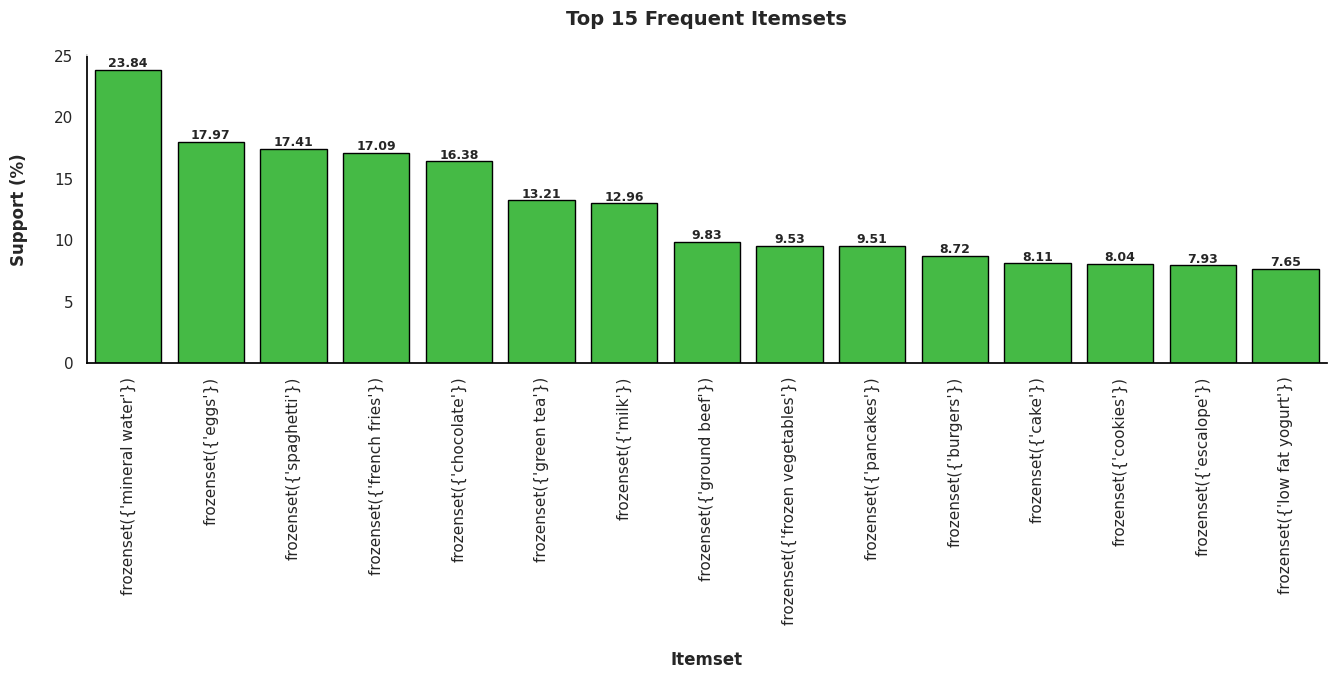

In [16]:
# Sort and filter top 15 most frequent itemsets
freq_sorted = frequent_itemsets.sort_values(by="support", ascending=False)
freq_sorted_top15 = freq_sorted.head(15)
freq_sorted_top15["support %"] = (freq_sorted_top15["support"]*100).round(2)

fig, ax = plt.subplots(figsize=(16, 4))
ax = sns.barplot(data=freq_sorted_top15, x="itemsets", y="support %", edgecolor="black", color='limegreen')
ax.bar_label(ax.containers[0], fontsize=9, fontweight=600)
plt.title("Top 15 Frequent Itemsets\n", fontsize=14, fontweight=700)
plt.xlabel("\nItemset", fontsize=12, fontweight=700)
plt.xticks(rotation=90)
plt.ylabel("Support (%)\n", fontsize=12, fontweight=700)
plt.gca().grid(False)
plt.gca().spines[["left", "bottom"]].set_color("black")
plt.gca().set_facecolor("white")
plt.show()

## **Concepts**
---
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title></title>
<style>
  body {
    font-family: Arial, sans-serif;
    font-size: 11pt;
    color: black;
  }
  li {
    font-weight: 500;
    margin-bottom: 10px;
  }
</style>
</head>
<body>
  <ul style="font-family: Arial; font-size: 11pt; color: black;">
    <li>The results from the F-P Growth algorithm show a list of association rules along with their confidence levels.<br><p></li>
    <li>These rules are derived from the frequent itemsets with a minimum support ratio of 0.02 and a minimum confidence of 0.3. The rules are ordered by confidence, descending from the top.<br><p></li>
    <li>Minimum support ratio of 0.02 = Only the items that appear in at least 2% of the total transactions in the dataset will be considered as frequent and thus eligible for further analysis in the generation of association rules.<br><p></li>
    <li>Since the dataset contains 7501 transactions, this means only items that appear in at least 151 (7501 * 0.02 = 150.02) transactions will be considered frequent.<br><p></li>
    <li>A confidence level of 0.3 (or 30%) in the context of association rule learning means that for a given antecedent &rarr; consequent, in 30% of the transactions containing item antecedent, item consequent also appears.</li>
  </ul>
  <script>
    // Any additional scripts can go here
  </script>
</body>
</html>


## **Observations from Apriori**
___
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title></title>
<style>
  body {
    font-family: Arial, sans-serif;
    font-size: 11pt;
    color: black;
  }
  li {
    font-weight: 500;
    margin-bottom: 10px;
  }
</style>
</head>
<body>
  <ul style="font-family: Arial; font-size: 11pt; color: black;">
    <li>The strongest association rule based on confidence is (ground beef) -> (spaghetti) with a confidence of about 0.3989, meaning that when ground beef is bought, spaghetti is also likely to be bought in 39.89% of the cases.<br><p></li>
    <li>The top rule suggests that customers who purchase soup are likely to purchase mineral water, with a confidence of about 45.66%.<br><p></li>
    <li>Olive oil, ground beef, and cooking oil also have strong associations with mineral water, with confidence levels above 39%.<br><p></li>
    <li>Ground beef also has a strong association with spaghetti as well, with a confidence of approximately 39.89%.<br><p></li>
    <li>There are repeated items with different associations, indicating they are commonly purchased with various other items. For example, mineral water is a frequent consequent, suggesting it is commonly bought with many different items.<b><p></li>
  </ul>
  <script>
    // Any additional scripts can go here
  </script>
</body>
</html>

# **Eclat**
---

In [17]:
# Load dataset and view sample rows
df = pd.read_csv("/kaggle/input/market-basket-optimisation/Market_Basket_Optimisation.csv", header=None)
df = df.reset_index(drop=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
!pip install pyECLAT

In [19]:
from pyECLAT import ECLAT
# loading transactions DataFrame to ECLAT class
eclat = ECLAT(data=df)
eclat.df_bin.head()

,corn,chutney,pasta,mashed potato,white wine,water spray,mint,gums,burgers,eggs,mint green tea,ham,nonfat milk,spinach,avocado,cottage cheese,chocolate,protein bar,light cream,french fries,energy bar,shallot,butter,clothes accessories,herb & pepper,salmon,green beans,turkey,chicken,tomato juice,tomatoes,ketchup,whole wheat pasta,gluten free bar,babies food,hot dogs,oil,body spray,frozen smoothie,chili,bacon,oatmeal,milk,yogurt cake,cake,fromage blanc,spaghetti,magazines,green tea,flax seed,mineral water,cookies,whole wheat rice,cereals,burger sauce,yams,soup,pepper,barbecue sauce,ground beef,fresh tuna,parmesan cheese,black tea,light mayo,mushroom cream sauce,vegetables mix,energy drink,meatballs,asparagus,cream,escalope,toothpaste,french wine,napkins,cauliflower,pancakes,eggplant,candy bars,cooking oil,fresh bread,carrots,extra dark chocolate,brownies,champagne,cider,strawberries,frozen vegetables,whole weat flour,red wine,asparagus,bramble,zucchini,dessert wine,almonds,tea,salad,strong cheese,olive oil,chocolate bread,sparkling water,salt,grated cheese,melons,low fat yogurt,rice,pickles,shrimp,antioxydant juice,pet food,mayonnaise,blueberries,shampoo,sandwich,muffins,tomato sauce,honey,hand protein bar,bug spray,soda,green grapes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# count items in each column
items_total = eclat.df_bin.astype(int).sum(axis=0)
items_total

corn                      36
chutney                   31
pasta                    118
mashed potato             31
white wine               124
water spray                3
mint                     131
gums                     101
burgers                  654
eggs                    1348
mint green tea            42
ham                      199
nonfat milk               78
spinach                   53
avocado                  250
cottage cheese           239
chocolate               1229
protein bar              139
light cream              117
french fries            1282
energy bar               203
shallot                   58
butter                   226
clothes accessories       63
herb & pepper            371
salmon                   319
green beans               65
turkey                   469
chicken                  450
tomato juice             228
tomatoes                 513
ketchup                   33
whole wheat pasta        221
gluten free bar           52
babies food   

In [21]:
# Loading items per column stats to the DataFrame
df = pd.DataFrame({'items': items_total.index, 'Count': items_total.values}) 
# cloning pandas DataFrame for visualization purpose  
df_table = df.sort_values("Count", ascending=False)
#  Top 5 most popular products/items
df_table.head(5).style.background_gradient(cmap='Blues')

,items,Count
50,mineral water,1788
9,eggs,1348
46,spaghetti,1306
19,french fries,1282
16,chocolate,1229


In [22]:
# importing required module
import plotly.express as px
# creating tree map using plotly
df_table50 = df_table.head(50)
df_table50['Label'] = df_table50.apply(lambda row: f"{row['items']}\n{row['Count']}", axis=1)
fig = px.treemap(df_table50, path=["Label"], values='Count', color="Count", hover_data=['items'],color_continuous_scale='Blues', title="Tree Map for Top 50 Items")
fig.update_layout(width=1400, height=600, title_font=dict(size=20, family="Arial Black"))
# ploting the treemap
fig.show()

In [23]:
# Define min support
min_support_threshold = 0.01

# Define min combination 
min_combination = 2

# Up to maximum items per transaction
# max_combination = max(items_total) - Setting this to the maximum number of items can lead to high computational cost. A practical limit should be between 2 and 4
max_combination = 3

# Apply the Eclat algorithm
rule_indices, rule_supports = eclat.fit(min_support=min_support_threshold, 
                                        min_combination=min_combination, 
                                        max_combination=max_combination,separator=' & ', 
                                        verbose=True)

Combination 2 by 2


2775it [00:20, 135.45it/s]


Combination 3 by 3


67525it [08:24, 133.80it/s]


In [24]:
# Association Rules
result = pd.DataFrame(rule_supports.items(),columns=['Item', 'Support'])
result.sort_values(by=['Support'], ascending=False)

,Item,Support
119,spaghetti & mineral water,0.059725
45,chocolate & mineral water,0.052660
23,eggs & mineral water,0.050927
103,milk & mineral water,0.047994
142,mineral water & ground beef,0.040928
43,chocolate & spaghetti,0.039195
122,spaghetti & ground beef,0.039195
21,eggs & spaghetti,0.036528
13,eggs & french fries,0.036395
147,mineral water & frozen vegetables,0.035729


# **FP-Growth Algorithm**
___

In [25]:
# Define a function to display FP-Tree
class FPNode:
    def __init__(self, item, count=1):
        self.item = item
        self.count = count
        self.parent = None
        self.children = {}

class FPTree:
    def __init__(self):
        self.root = FPNode(None, 0)

    def insert_transaction(self, transaction):
        current_node = self.root

        for item in transaction:
            if item in current_node.children:
                current_node.children[item].count += 1
            else:
                new_node = FPNode(item, 1)
                new_node.parent = current_node
                current_node.children[item] = new_node

            current_node = current_node.children[item]

    def print_tree(self, node=None, indent=""):
        if node is None:
            node = self.root

        print(indent + str(node.item) + " (" + str(node.count) + ")")

        for child in node.children.values():
            self.print_tree(child, indent + "  ")

In [26]:
# Load dataset and view sample rows
df = pd.read_csv("/kaggle/input/market-basket-optimisation/Market_Basket_Optimisation.csv", header=None, names=[f"Item_{i}" for i in range(2, 21)])
df = df.reset_index()
df.rename(columns={'index': 'Item1'}, inplace=True)
df.head()

,Item1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10,Item_11,Item_12,Item_13,Item_14,Item_15,Item_16,Item_17,Item_18,Item_19,Item_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
txns = df.fillna("").values.tolist()
txns = [[item for item in txn if item != ''] for txn in txns]
txns = [[item.strip() for item in txn] for txn in txns]
print(txns)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

In [28]:
fp_tree = FPTree()

# Insert transactions into the FP-Tree
for transaction in txns:
    fp_tree.insert_transaction(transaction)

# Print the FP-Tree
fp_tree.print_tree()

None (0)
  shrimp (325)
    almonds (1)
      avocado (1)
        vegetables mix (1)
          green grapes (1)
            whole weat flour (1)
              yams (1)
                cottage cheese (1)
                  energy drink (1)
                    tomato juice (1)
                      low fat yogurt (1)
                        green tea (1)
                          honey (1)
                            salad (1)
                              mineral water (1)
                                salmon (1)
                                  antioxydant juice (1)
                                    frozen smoothie (1)
                                      spinach (1)
                                        olive oil (1)
    chocolate (8)
      chicken (1)
        honey (1)
          oil (1)
            cooking oil (1)
              low fat yogurt (1)
      water spray (1)
      butter (1)
        cooking oil (1)
          escalope (1)
      mushroom cream sauce (1)
        candy b

In [29]:
!pip install fpgrowth_py

In [30]:
from fpgrowth_py import fpgrowth

frequent_itemsets, rules = fpgrowth(txns, minSupRatio=0.01, minConf=0.4)
print(frequent_itemsets)
print(f"\n{rules}")

[{'nonfat milk'}, {'cider'}, {'barbecue sauce'}, {'magazines'}, {'yams'}, {'body spray'}, {'extra dark chocolate'}, {'melons'}, {'eggplant'}, {'gums'}, {'fromage blanc'}, {'tomato sauce'}, {'black tea'}, {'carrots'}, {'light cream'}, {'pasta'}, {'white wine'}, {'mint'}, {'protein bar'}, {'rice'}, {'mushroom cream sauce'}, {'parmesan cheese'}, {'almonds'}, {'meatballs'}, {'strawberries'}, {'fresh tuna'}, {'french wine'}, {'oil'}, {'muffins'}, {'vegetables mix'}, {'cereals'}, {'mineral water', 'cereals'}, {'pepper'}, {'energy drink'}, {'energy bar'}, {'ham'}, {'light mayo'}, {'yogurt cake'}, {'red wine'}, {'spaghetti', 'red wine'}, {'mineral water', 'red wine'}, {'whole wheat pasta'}, {'butter'}, {'tomato juice'}, {'cottage cheese'}, {'hot dogs'}, {'avocado'}, {'mineral water', 'avocado'}, {'brownies'}, {'salmon'}, {'salmon', 'chocolate'}, {'salmon', 'spaghetti'}, {'salmon', 'mineral water'}, {'fresh bread'}, {'mineral water', 'fresh bread'}, {'champagne'}, {'champagne', 'chocolate'}, {'

In [31]:
# Convert each frequent_itemsets set to a string
freq_itemsets_str = [', '.join(list(itemset)) for itemset in frequent_itemsets]

# Create DataFrame
freq_itemsets_df = pd.DataFrame(freq_itemsets_str, columns=['Itemset'])
freq_itemsets_df

,Itemset
0,nonfat milk
1,cider
2,barbecue sauce
3,magazines
4,yams
5,body spray
6,extra dark chocolate
7,melons
8,eggplant
9,gums


In [32]:
# Convert rules to DataFrame
rules_df = pd.DataFrame(rules, columns=['Antecedent', 'Consequent', 'Confidence'])
rules_df = rules_df.sort_values(by="Confidence", ascending =False).reset_index(drop=True)
rules_df

,Antecedent,Consequent,Confidence
0,"{eggs, ground beef}",{mineral water},0.506667
1,"{milk, ground beef}",{mineral water},0.503030
2,"{ground beef, chocolate}",{mineral water},0.473988
3,"{milk, frozen vegetables}",{mineral water},0.468927
4,{soup},{mineral water},0.456464
5,"{spaghetti, pancakes}",{mineral water},0.455026
6,"{spaghetti, olive oil}",{mineral water},0.447674
7,"{milk, spaghetti}",{mineral water},0.443609
8,"{milk, chocolate}",{mineral water},0.435685
9,"{spaghetti, ground beef}",{mineral water},0.435374


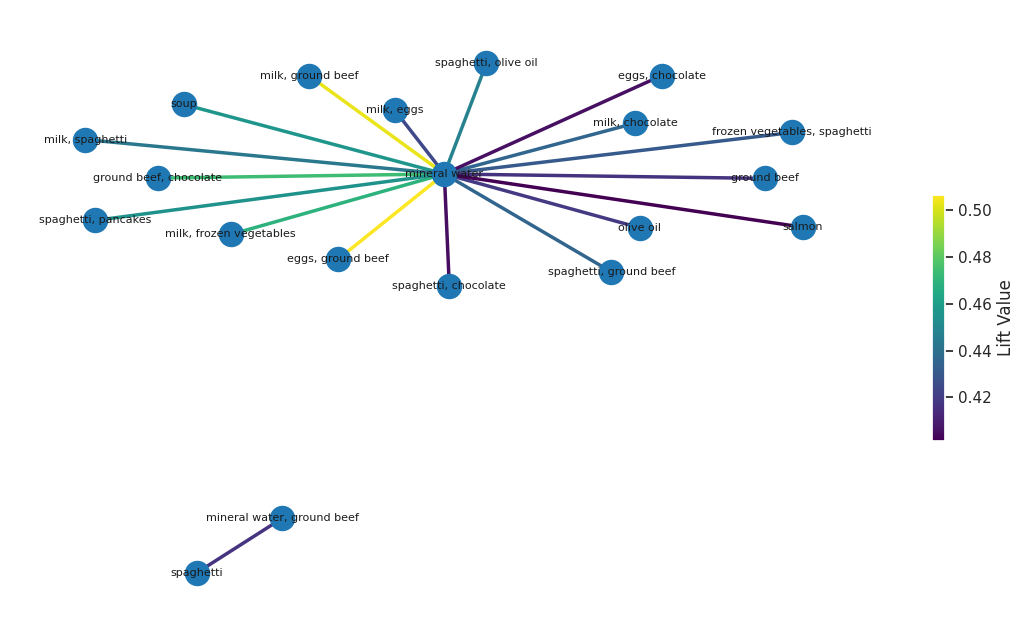

In [33]:
# Create a graph
G = nx.Graph()

for _, row in rules_df.iterrows():
    # Convert frozenset to string, if they are frozensets
    antecedents_str = ', '.join(row['Antecedent'])
    consequents_str = ', '.join(row['Consequent'])
    
    # Add nodes and edges with the string labels
    G.add_node(antecedents_str)
    G.add_node(consequents_str)
    G.add_edge(antecedents_str, consequents_str, weight=row['Confidence'])

colormap = get_cmap('viridis')
lift_values = [data["weight"] for _, _, data in G.edges(data=True)]
lift_min = min(lift_values)
lift_max = max(lift_values)
lift_norm = mcolors.Normalize(vmin=lift_min, vmax=lift_max)

# Define edge colors and widths based on lift values
edge_colors = lift_values
edge_widths = 2.5

# Plot the graph
fig, ax = plt.subplots(figsize=(14, 8))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=50)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw(G, pos, edge_color=edge_colors, width=edge_widths, edge_cmap=colormap, edge_vmin=lift_min, edge_vmax=lift_max)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=colormap, norm=lift_norm), ax=ax, shrink=0.4)
cbar.set_label("Lift Value")

plt.axis("off")
plt.show()

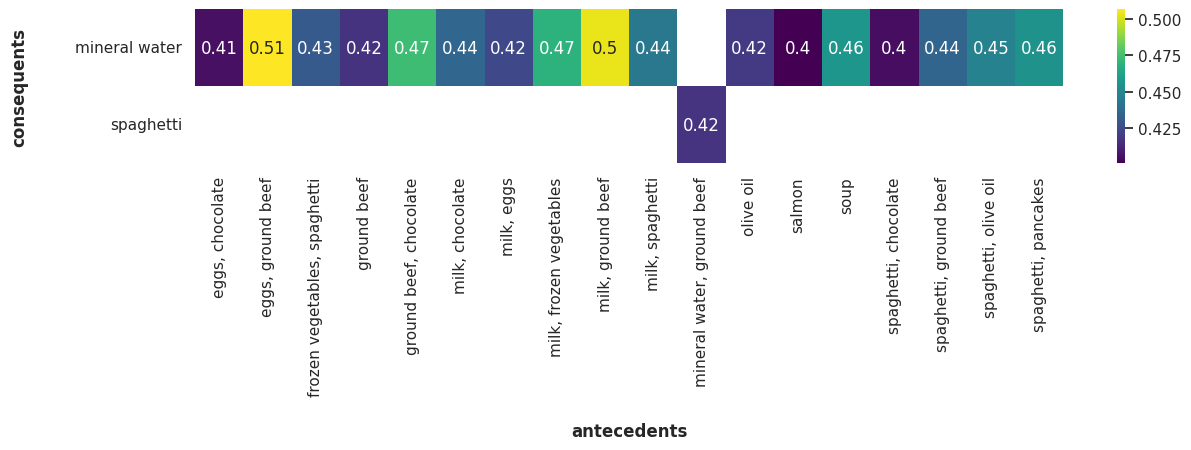

In [34]:
# Convert frozensets to strings and remove 'frozenset' from the representation
rules_df['Antecedent'] = rules_df['Antecedent'].apply(lambda x: ', '.join(list(x)))
rules_df['Consequent'] = rules_df['Consequent'].apply(lambda x: ', '.join(list(x)))

# Show frequency or strength of item associations
pivot_table = rules_df.pivot(index="Consequent", columns="Antecedent", values="Confidence")
plt.figure(figsize=(14, 2))
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.xlabel("\nantecedents", fontsize=12, fontweight=600)
plt.ylabel("consequents\n\n", fontsize=12, fontweight=600)
plt.gca().set_facecolor("white")
plt.show()

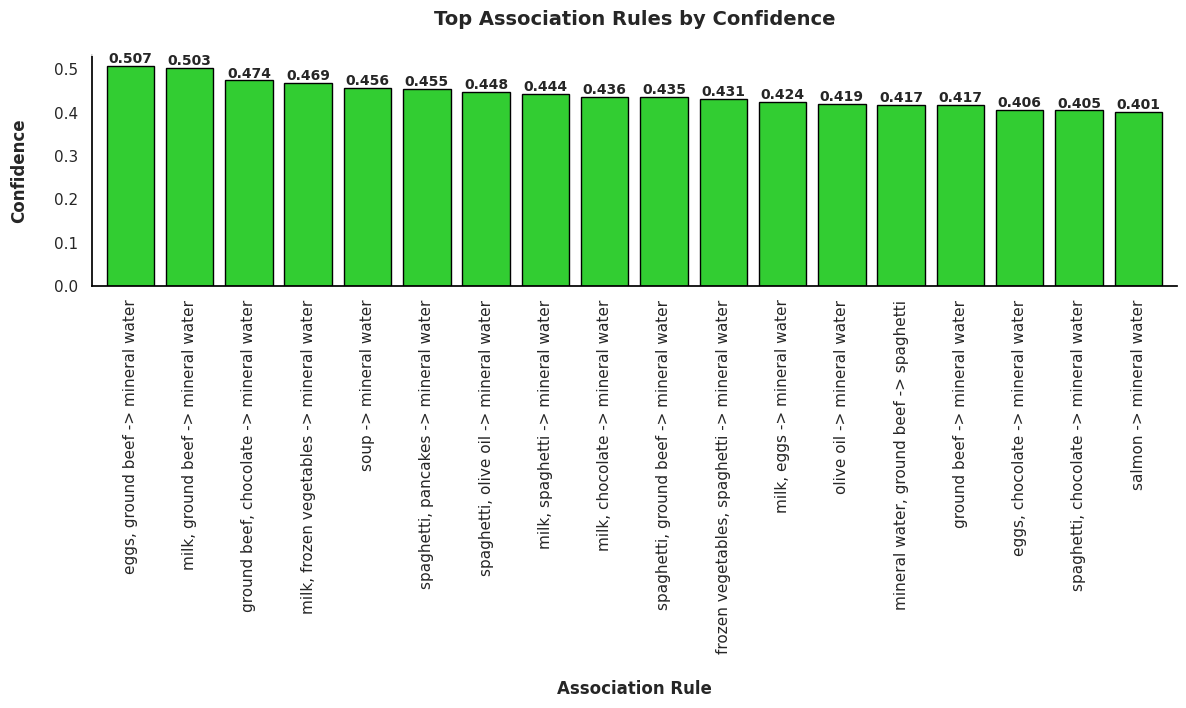

In [35]:
# Combine Antecedent and Consequent into a single string
rules_df['Rule'] = rules_df['Antecedent'].astype(str) + ' -> ' + rules_df['Consequent'].astype(str)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(14, 3))
rules_df.plot(kind='bar', x='Rule', y='Confidence', color='limegreen', edgecolor="black", width=0.8, ax=ax, legend=False)
ax.bar_label(ax.containers[0], fontsize=10, fontweight=600, fmt=lambda x: f'{x:.3f}')
plt.title('Top Association Rules by Confidence\n', fontsize=14, fontweight=700)
plt.xlabel('\nAssociation Rule', fontsize=12, fontweight=700)
plt.ylabel('Confidence\n', fontsize=12, fontweight=700)
plt.gca().grid(False)
plt.gca().spines[["left", "bottom"]].set_color("black")
plt.gca().set_facecolor("white")
plt.xticks(rotation=90) 
plt.show()

## **Observations from FP-Growth**
___

<span>
    <ul style="font-family:Robotosans; font-size:11pt; color:black;">
        <li>Mineral water is a common item that tends to be bought with a variety of other products, making it a staple in the transactions.<br><p>
            <li>The top rule suggests that customers who purchase soup are likely to purchase mineral water, with a confidence of about 45.66%.<br><p>
                <li>Olive oil, ground beef, and cooking oil also have strong associations with mineral water, with confidence levels above 39%.<br><p>
                    <li>Ground beef also has a strong association with spaghetti as well, with a confidence of approximately 39.89%.<br><p>
                        <li>There are repeated items with different associations, indicating they are commonly purchased with various other items. For example, mineral water is a frequent consequent, suggesting it is commonly bought with many different items.<br><p>
                        </li>
                    </li>
                </li>
            </li>
       </li>
</ul>
                            
<span style="font-family:Robotosans; font-size:12pt; color:black;">The rules provide insights into potential cross-selling or promotional opportunities. For example, offering a discount on mineral water when customers buy soup or ground beef might encourage additional sales.</span>

In [36]:
s = """
<style>
    th {background-color: darkslategrey; color: white; border: 1px solid white; font-family: exosans; font-size: 12pt; font-weight: bold; text-align: left; vertical-align: top;}
    tr {background-color: darkslategrey; color: white; border: 1px solid white; font-family: exosans; font-size: 12pt; font-weight: 500; text-align: center; vertical-align: top;}
    td {color: black; border: 1px solid darkslategrey; font-family: exosans; font-size: 11pt; text-align: left; vertical-align: top;}
</style>
"""

# Importing display and HTML functions directly
from IPython.display import display, HTML
# Using the display function to render the HTML content
display(HTML(s))